In [1]:
names = open('names.txt', 'r').read().splitlines()

In [2]:
names[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(names)

32033

In [4]:
min(len(n) for n in names)

2

In [5]:
max(len(n) for n in names)

15

In [20]:
b = {}
for w in names:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        #[w0, w1, w2, w3] 
        #[w1, w2, w3]
        # -> (w0, w1), (w1, w2), (w2, w3)

        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [24]:
sorted(b.items(), key = lambda kv: kv[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [25]:
import torch

In [34]:
chars = sorted(set(''.join(names)))
stoi = {char:i for i, char in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

In [36]:
N = torch.zeros((28, 28), dtype=torch.int32)

for w in names:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        #[w0, w1, w2, w3] 
        #[w1, w2, w3]
        # -> (w0, w1), (w1, w2), (w2, w3)
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        N[ix1, ix2] += 1

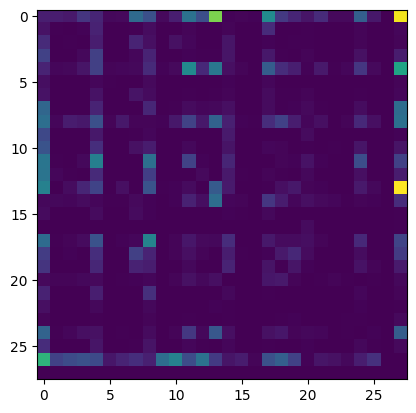

In [38]:
import matplotlib.pyplot as plt

plt.imshow(N)